In [0]:
import pandas as pd
import numpy as np
import re 
import nltk  
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/gdrive/My Drive/Patient/train.csv',header=0,encoding = 'unicode_escape')
test_data = pd.read_csv('/content/gdrive/My Drive/Patient/test.csv',header=0,encoding = 'unicode_escape')

In [0]:
dataset.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


In [0]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
corpus = []  

for i in range(0, 1157):  
    
    review = re.sub('[^a-zA-Z]', ' ', str(dataset['TRANS_CONV_TEXT'][i]))  
    review = review.lower() 
    review = review.split()  
    ps = PorterStemmer()  
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
    review = ' '.join(review)   
    
    corpus.append(review)  

In [0]:
len(corpus)

1157

In [0]:
cv = CountVectorizer(max_features = 1500)  
   
X = cv.fit_transform(corpus).toarray()  
  
y = dataset['Patient_Tag']

In [0]:
y.shape

(1157,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Random Forest

In [0]:
model = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = model.predict(x_test) 
  
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [0]:
accuracy_score(y_test,y_pred)

0.7887931034482759

# Naive Bayes

In [0]:
gaussian_model = GaussianNB()

In [0]:
gaussian_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_gauss_pred = gaussian_model.predict(x_test)

In [0]:
y_gauss_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [0]:
print("Gaussian NB accuracy: {}".format(accuracy_score(y_test, y_gauss_pred)))

Gaussian NB accuracy: 0.7456896551724138


In [0]:
multinomial_model = MultinomialNB()

multinomial_model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_mul_preds = multinomial_model.predict(x_test)

In [0]:
print("Multinomial NB accuracy: {}".format(accuracy_score(y_pred, y_mul_preds)))

Multinomial NB accuracy: 0.6939655172413793


In [0]:
dataset.columns=["source","host","link","date","duration","time","title","comment","tag"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94194a44a8>]],
      dtype=object)

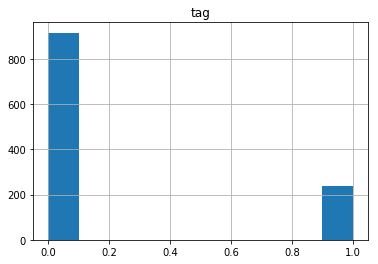

In [0]:
dataset.hist()

In [0]:
ds=dataset.copy()

In [0]:
ds["source"].replace("FORUMS","0",inplace=True)
ds["source"].replace("BLOG","1",inplace=True)
ds["source"].replace("FACEBOOK","2",inplace=True)
ds["source"].replace("Facebook","2",inplace=True)
ds["source"].replace("YOUTUBE","3",inplace=True)


In [0]:
ds.head()

,source,host,link,date,duration,time,title,comment,tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


<BarContainer object of 1157 artists>

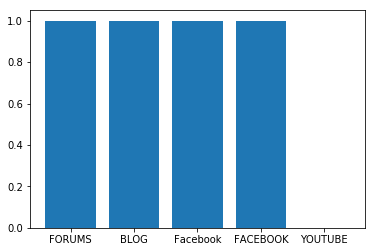

In [0]:
x=np.array(ds["source"])
y=np.array(ds["tag"])
plt.bar(x,y)

In [0]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[166,   5],
       [ 44,  17]])

In [0]:
conf_mat_gauss=confusion_matrix(y_test,y_gauss_pred)
conf_mat_gauss

array([[143,  28],
       [ 31,  30]])

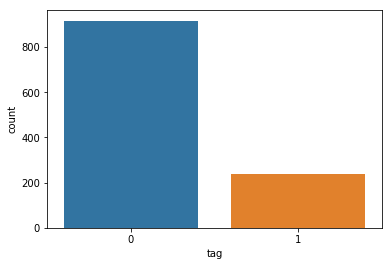

In [0]:
import seaborn as sns
sns.countplot(label='count',x='tag', data=dataset)

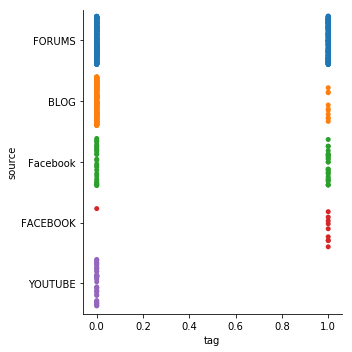

In [0]:
sns.catplot(data=ds,y='source',x='tag',jitter=0.4)